# Analisando um jogador especifico



In [1]:
from statsbombpy import sb
import pandas as pd
from mplsoccer import VerticalPitch,Pitch
from highlight_text import ax_text, fig_text
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import seaborn as sns
from functools import reduce

In [2]:
# Competições
sb.competitions().query('country_name.str.contains("International", case=False)').sort_values(by='match_updated', ascending=False)


,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
72,72,107,International,Women's World Cup,female,False,True,2023,2024-07-14T16:59:48.469596,2024-07-14T17:01:38.887279,2024-07-14T17:01:38.887279,2024-07-14T16:59:48.469596
30,43,3,International,FIFA World Cup,male,False,True,2018,2024-06-12T07:38:19.345758,2021-06-13T16:17:31.694,None,2024-06-12T07:38:19.345758
29,43,106,International,FIFA World Cup,male,False,True,2022,2024-05-15T10:23:32.854925,2024-06-11T11:30:50.462448,2024-06-11T11:30:50.462448,2024-05-15T10:23:32.854925
34,43,272,International,FIFA World Cup,male,False,True,1970,2024-02-13T14:23:06.735299,None,None,2024-02-13T14:23:06.735299
36,43,269,International,FIFA World Cup,male,False,True,1958,2024-02-13T14:22:08.222297,None,None,2024-02-13T14:22:08.222297
28,1470,274,International,FIFA U20 World Cup,male,False,False,1979,2024-02-13T14:20:59.825440,None,None,2024-02-13T14:20:59.825440
73,72,30,International,Women's World Cup,female,False,True,2019,2024-02-13T09:41:26.379767,2021-06-13T16:17:31.694,None,2024-02-13T09:41:26.379767
33,43,51,International,FIFA World Cup,male,False,True,1974,2024-02-13T02:52:29.582599,2021-06-13T16:17:31.694,None,2024-02-13T02:52:29.582599
32,43,54,International,FIFA World Cup,male,False,True,1986,2023-12-26T22:34:04.263530,2021-06-13T16:17:31.694,None,2023-12-26T22:34:04.263530
31,43,55,International,FIFA World Cup,male,False,True,1990,2023-06-28T10:58:20.137929,2021-06-12T16:17:31.694,None,2023-06-28T10:58:20.137929


In [3]:
sb.competitions()['country_name'].unique()

array(['Germany', 'Africa', 'Europe', 'South America', 'Spain', 'England',
       'International', 'India', 'Argentina', 'France',
       'United States of America', 'North and Central America', 'Italy'],
      dtype=object)

In [4]:
euro_2024_matches = sb.matches(competition_id=55, season_id=282)

In [5]:
# função para pegar as partidas de um time específico

def team_matches(team, df_matches):
    team_matches = df_matches.query((f'home_team == "{team}" or away_team == "{team}"'))
    return team_matches.sort_values(by='match_date', ascending=False)

In [6]:
team = "Netherlands"
df_matches = sb.matches(competition_id=55, season_id=282) # partidas da eurocopa 2024

team_matches = team_matches(team, df_matches)

In [7]:
team_matches

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,3942819,2024-07-10,22:00:00.000,Europe - UEFA Euro,2024,Netherlands,England,1,2,available,...,2024-07-15T07:57:36.684453,6,Semi-finals,Signal-Iduna-Park,Felix Zwayer,Ronald Koeman,Gareth Southgate,1.1.0,2,2
3,3942382,2024-07-06,22:00:00.000,Europe - UEFA Euro,2024,Netherlands,Turkey,2,1,available,...,2024-07-10T06:56:35.146850,5,Quarter-finals,Olympiastadion Berlin,Clément Turpin,Ronald Koeman,Vincenzo Montella,1.1.0,2,2
12,3941021,2024-07-02,19:00:00.000,Europe - UEFA Euro,2024,Romania,Netherlands,0,3,available,...,2024-07-12T23:28:27.122555,4,Round of 16,Allianz Arena,Felix Zwayer,Edward Iordănescu,Ronald Koeman,1.1.0,2,2
5,3930180,2024-06-25,19:00:00.000,Europe - UEFA Euro,2024,Netherlands,Austria,2,3,available,...,2024-07-11T13:25:37.289456,3,Group Stage,Olympiastadion Berlin,Ivan Kružliak,Ronald Koeman,Ralf Rangnick,1.1.0,2,2
22,3930173,2024-06-21,22:00:00.000,Europe - UEFA Euro,2024,Netherlands,France,0,0,available,...,2024-07-12T19:39:43.381031,2,Group Stage,Trainingszentrum RB Leipzig Platz 1,Anthony Taylor,Ronald Koeman,Didier Deschamps,1.1.0,2,2
29,3938637,2024-06-16,16:00:00.000,Europe - UEFA Euro,2024,Poland,Netherlands,1,2,available,...,2024-07-12T03:39:53.010211,1,Group Stage,Volksparkstadion,Artur Manuel Ribeiro Soares Dias,Michał Probierz,Ronald Koeman,1.1.0,2,2


### Eventos da partida

In [8]:
# eventos da partida Holanda x Inglaterra
match = sb.events(match_id=3942819)

# função para tratar eventos da partida
def split_locations(df):
    df[['x', 'y']] = df['location'].apply(pd.Series)
    df[['pass_end_x', 'pass_end_y']] = df['pass_end_location'].apply(pd.Series) # separar ponto final dos passes
    df[['carry_end_x', 'carry_end_y']] = df['carry_end_location'].apply(pd.Series) # separar ponto final das conduções
    return df

In [9]:
match_events = split_locations(match)

In [10]:
match_events.columns

Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'block_deflection', 'block_save_block', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_right_foot', 'counterpress',
       'dribble_outcome', 'duel_outcome', 'duel_type', 'duration',
       'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_penalty', 'foul_won_advantage', 'foul_won_defensive',
       'foul_won_penalty', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_punched_out',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'injury_stoppage_in_chain', 'interception_outcome', 'location',
       'match_id', 'minute', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_cut_back', 'pass_deflected', 'pass_end_location',
       'pass_goal_assis

In [11]:
# Search columns names
expression = 'pass'
passes_columns = list(filter(lambda x: expression in x.lower(), match_events.columns))

In [12]:
teste = match_events.apply(lambda x: expression in x)

In [13]:
teste

50_50                   False
bad_behaviour_card      False
ball_receipt_outcome    False
block_deflection        False
block_save_block        False
                        ...  
y                       False
pass_end_x              False
pass_end_y              False
carry_end_x             False
carry_end_y             False
Length: 95, dtype: bool

In [14]:
passes_columns

['pass_aerial_won',
 'pass_angle',
 'pass_assisted_shot_id',
 'pass_body_part',
 'pass_cross',
 'pass_cut_back',
 'pass_deflected',
 'pass_end_location',
 'pass_goal_assist',
 'pass_height',
 'pass_length',
 'pass_outcome',
 'pass_outswinging',
 'pass_recipient',
 'pass_recipient_id',
 'pass_shot_assist',
 'pass_switch',
 'pass_technique',
 'pass_through_ball',
 'pass_type',
 'shot_key_pass_id',
 'pass_end_x',
 'pass_end_y']

In [73]:
match_events[['player','type','pass_type', 'pass_outcome', 'pass_recipient', 'pass_switch']].query('type == "Pass" & pass_outcome == "Incomplete"')

,player,type,pass_type,pass_outcome,pass_recipient,pass_switch
7,Jordan Pickford,Pass,NaN,Incomplete,NaN,NaN
8,Virgil van Dijk,Pass,Recovery,Incomplete,Memphis Depay,NaN
35,Jude Bellingham,Pass,NaN,Incomplete,NaN,NaN
55,Harry Kane,Pass,NaN,Incomplete,NaN,NaN
62,Xavi Simons,Pass,NaN,Incomplete,Donyell Malen,NaN
...,...,...,...,...,...,...
1056,Joey Veerman,Pass,NaN,Incomplete,Joshua Zirkzee,NaN
1061,Joey Veerman,Pass,NaN,Incomplete,Joshua Zirkzee,NaN
1064,Cole Palmer,Pass,NaN,Incomplete,Ollie Watkins,NaN
1069,Wout Weghorst,Pass,NaN,Incomplete,Stefan de Vrij,NaN


In [66]:
match_events['pass_outcome'].unique()

array([nan, 'Incomplete', 'Pass Offside', 'Out', 'Unknown'], dtype=object)

### Agregações de eventos dos jogadores

In [15]:
match_events

,50_50,bad_behaviour_card,ball_receipt_outcome,block_deflection,block_save_block,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,team_id,timestamp,type,under_pressure,x,y,pass_end_x,pass_end_y,carry_end_x,carry_end_y
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,941,00:00:00.000,Starting XI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,768,00:00:00.000,Starting XI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,941,00:00:00.000,Half Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,768,00:00:00.000,Half Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,941,00:00:00.000,Half Start,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,941,00:50:09.942,Half End,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,768,00:50:09.942,Half End,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3482,NaN,Yellow Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,941,00:41:26.052,Bad Behaviour,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3483,NaN,Yellow Card,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,941,00:45:18.606,Bad Behaviour,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
match_events['team'].unique()

array(['Netherlands', 'England'], dtype=object)

In [17]:
# Tipos de eventos 

events_list = list(match_events['type'].unique())

In [18]:
events_list

['Starting XI',
 'Half Start',
 'Pass',
 'Ball Receipt*',
 'Carry',
 'Pressure',
 'Miscontrol',
 'Ball Recovery',
 'Foul Committed',
 'Foul Won',
 'Dribbled Past',
 'Dribble',
 'Block',
 'Interception',
 'Duel',
 'Goal Keeper',
 'Clearance',
 'Dispossessed',
 'Shot',
 'Injury Stoppage',
 'Player Off',
 'Player On',
 'Referee Ball-Drop',
 '50/50',
 'Substitution',
 'Tactical Shift',
 'Half End',
 'Bad Behaviour']

In [19]:
# Criando uma lista de jogadores da equipe analisada
team = "Netherlands"

players_team = [match_events.query(f'team == "{team}"')['player'].unique()]

players_team = list(players_team[0][1:])

In [20]:
players_team

['Virgil van Dijk',
 'Nathan Aké',
 'Stefan de Vrij',
 'Jerdy Schouten',
 'Denzel Dumfries',
 'Bart Verbruggen',
 'Memphis Depay',
 'Xavi Simons',
 'Tijjani Reijnders',
 'Donyell Malen',
 'Cody Mathès Gakpo',
 'Joey Veerman',
 'Wout Weghorst',
 'Joshua Zirkzee',
 'Brian Brobbey']

In [21]:
# Nome do jogador e tipos de eventos

player_name = 'Xavi Simons'
events_types = ['Ball Receipt*', 'Pass', 'Dribble', 'Shot', 'Interception', 'Foul Commited', 'Foul Won', 'Miscontrol', 'Block', 'Dispossessed', 'Ball Recovery']


Dicionario do jogador

In [22]:
player_dict = {'Name':player_name}

In [23]:
for event in events_types:
    specific_event = match_events[(match_events.player==player_name)&(match_events.type==event)]
    try:
        data_event = int(specific_event.groupby('player').size().reset_index().loc[0, 0])
    except:
        data_event = 0
    player_dict[event] = data_event


In [24]:
player_dict

{'Name': 'Xavi Simons',
 'Ball Receipt*': 48,
 'Pass': 40,
 'Dribble': 1,
 'Shot': 2,
 'Interception': 1,
 'Foul Commited': 0,
 'Foul Won': 2,
 'Miscontrol': 1,
 'Block': 2,
 'Dispossessed': 1,
 'Ball Recovery': 2}

In [25]:
# Goals

goals_df=match_events[(match_events.type=="Shot")&(match_events.shot_outcome=="Goal")]
goals_df = goals_df.groupby('player').size().reset_index()#.loc[0, 0])
goals_df

,player,0
0,Harry Kane,1
1,Ollie Watkins,1
2,Xavi Simons,1


In [26]:
try:
    player_goals = int(goals_df.query(f'player == "{player_name}"').reset_index().loc[0,0])
except:
    player_goals = 0
player_dict['Goals'] = player_goals
player_dict

{'Name': 'Xavi Simons',
 'Ball Receipt*': 48,
 'Pass': 40,
 'Dribble': 1,
 'Shot': 2,
 'Interception': 1,
 'Foul Commited': 0,
 'Foul Won': 2,
 'Miscontrol': 1,
 'Block': 2,
 'Dispossessed': 1,
 'Ball Recovery': 2,
 'Goals': 1}

Assists

In [27]:
match_events['pass_goal_assist'].unique()

array([nan, True], dtype=object)

In [28]:
match_events['pass_outcome'].unique()

array([nan, 'Incomplete', 'Pass Offside', 'Out', 'Unknown'], dtype=object)

In [29]:
# Assists

assists_df=match_events[(match_events.type=="Pass")&(match_events.pass_goal_assist==True)]
assists_df = assists_df.groupby('player').size().reset_index()#.loc[0, 0])

try:
    player_assists = int(assists_df.query(f'player == "{player_name}"').reset_index().loc[0,0])
except:
    player_assists = 0
player_dict['Assists'] = player_assists
player_dict



{'Name': 'Xavi Simons',
 'Ball Receipt*': 48,
 'Pass': 40,
 'Dribble': 1,
 'Shot': 2,
 'Interception': 1,
 'Foul Commited': 0,
 'Foul Won': 2,
 'Miscontrol': 1,
 'Block': 2,
 'Dispossessed': 1,
 'Ball Recovery': 2,
 'Goals': 1,
 'Assists': 0}

Crosses

In [30]:
# Crosses

crosses_df=match_events[(match_events.type=="Pass")&(match_events.pass_cross==True)]
crosses_df = crosses_df.groupby('player').size().reset_index()#.loc[0, 0])

try:
    player_crosses = int(crosses_df.query(f'player == "{player_name}"').reset_index().loc[0,0])
except:
    player_crosses = 0
player_dict['Crosses'] = player_crosses
player_dict


{'Name': 'Xavi Simons',
 'Ball Receipt*': 48,
 'Pass': 40,
 'Dribble': 1,
 'Shot': 2,
 'Interception': 1,
 'Foul Commited': 0,
 'Foul Won': 2,
 'Miscontrol': 1,
 'Block': 2,
 'Dispossessed': 1,
 'Ball Recovery': 2,
 'Goals': 1,
 'Assists': 0,
 'Crosses': 0}

In [31]:
# Proximo passo: armazenar valores dos eventos de forma a permitir gerar graficos

# Passes para gráfico

In [32]:
# Passes sem groupby

player_passes=match_events[(match_events.type=="Pass")&(match_events.player==player_name)&(match_events.pass_outcome.isna())]
#passes_df = passes_df.groupby('player').size().reset_index()#.loc[0, 0])

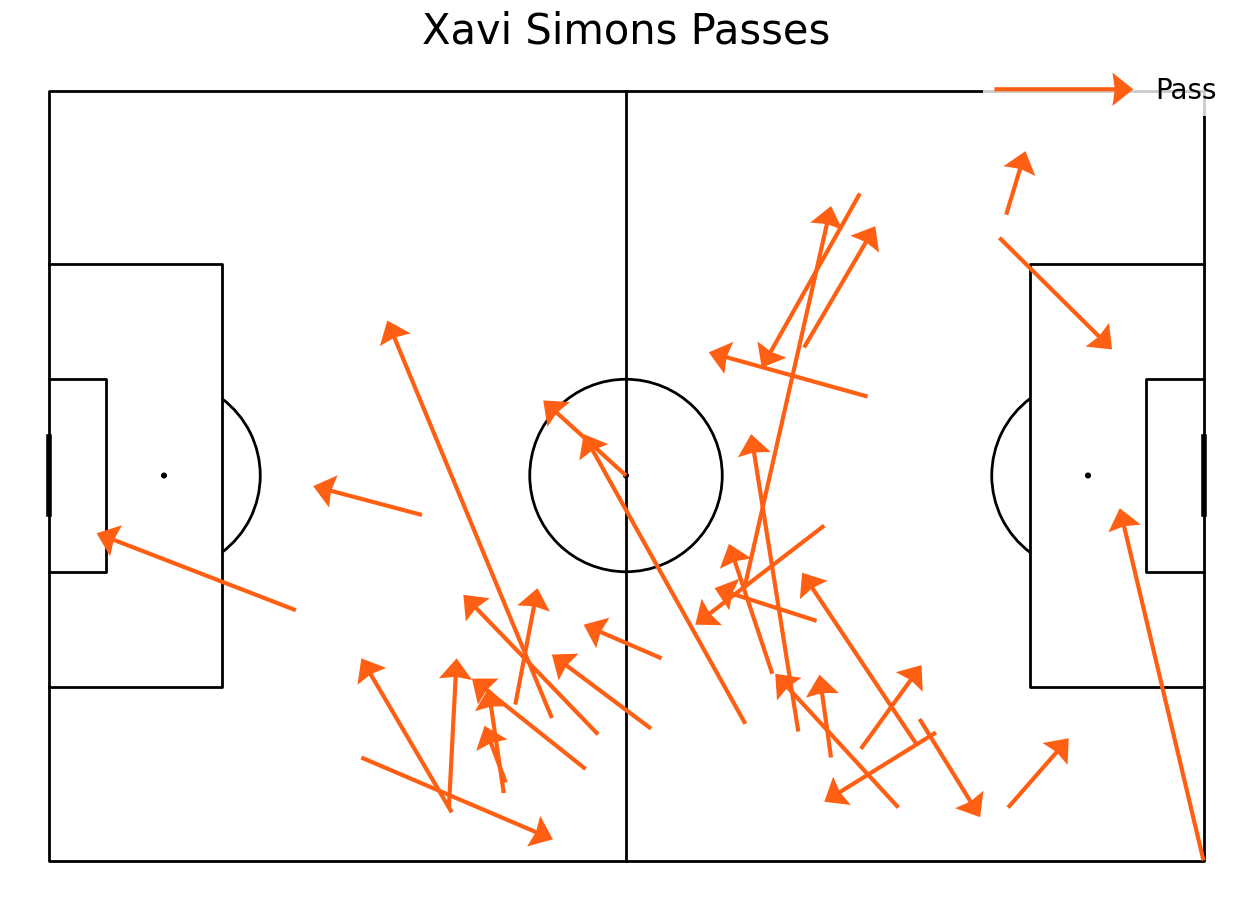

In [33]:
# campo
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_zorder=2, line_color='black')
fig, ax = pitch.draw(figsize=(16, 11),constrained_layout=True, tight_layout=False)
fig.set_facecolor('white')

# passes
pass_colour='#FF5F13'
pitch.arrows(player_passes.x, player_passes.y,
player_passes.pass_end_x, player_passes.pass_end_y, width=3,
headwidth=8, headlength=5, color=pass_colour, ax=ax, zorder=2, label = "Pass")

ax.legend(facecolor='white', handlelength=5, edgecolor='None', fontsize=20, loc='best')
ax_title = ax.set_title(f'{player_name} Passes', fontsize=30,color='black')

# Mapa de calor - gráfico

In [34]:
touches=['Pass', 'Ball Receipt*', 'Carry', 'Clearance', 'Foul Won', 'Block',
'Ball Recovery', 'Duel', 'Dribble', 'Interception', 'Miscontrol', 'Shot']

In [35]:
 # Trazer da coluna 'type' os eventos que constam na lista 'touches'
player_touches_df=match_events[(match_events.player==player_name)&(match_events.type.isin(touches))]

In [36]:
#criando degradê de cores
colour1="white"
colour2="#EBBC04"
colour3="#e21017"
cmaplist = [colour1, colour2, colour3]
cmap = LinearSegmentedColormap.from_list("", cmaplist)

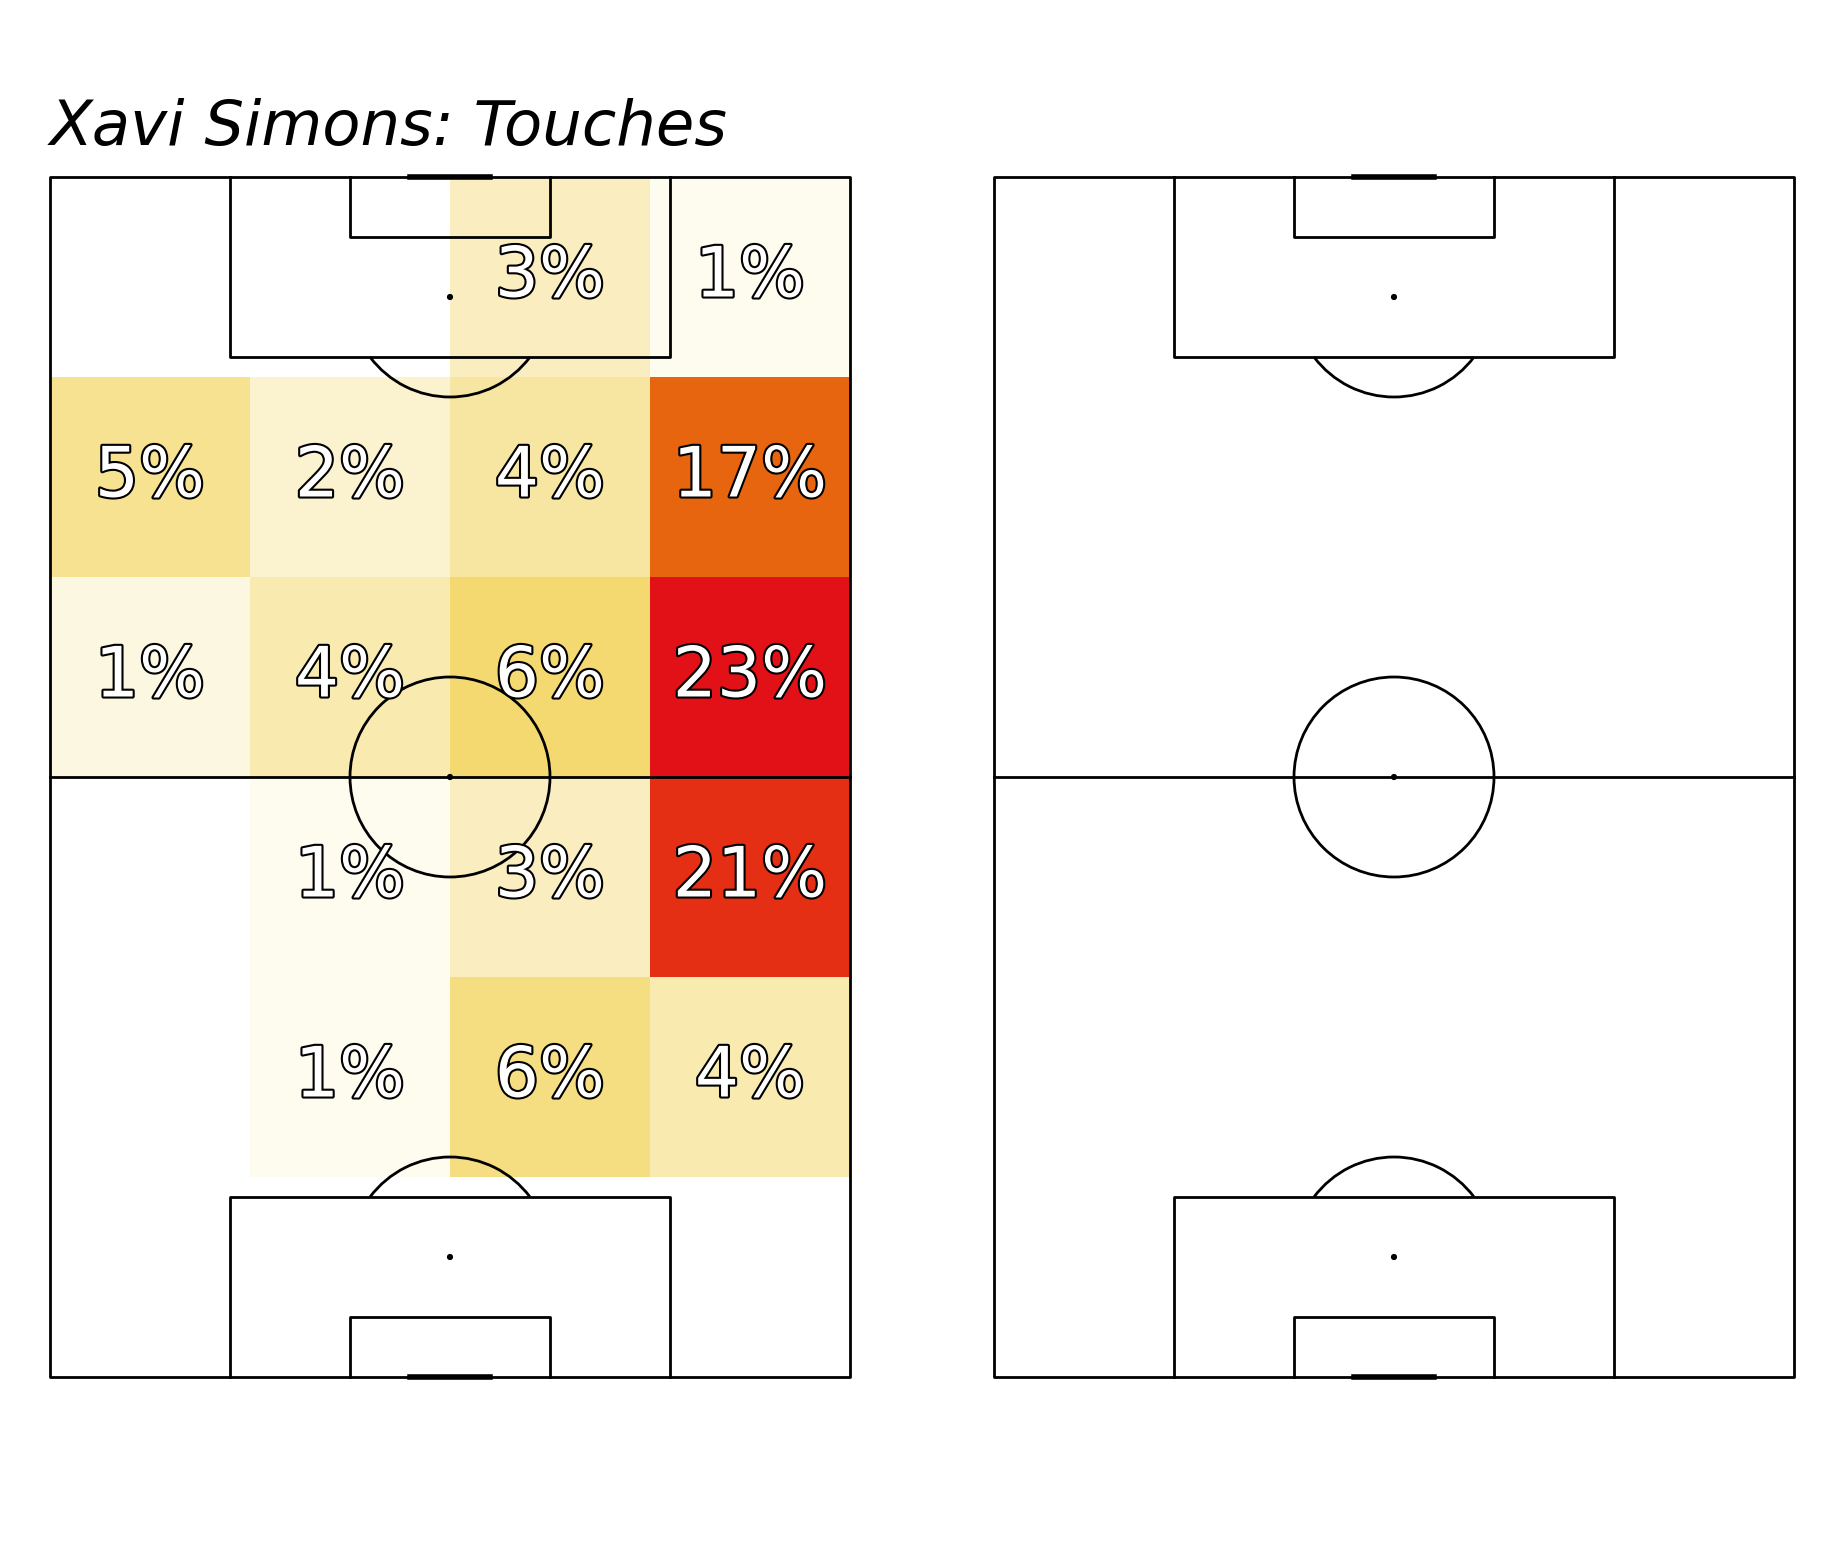

In [37]:
path_eff = [path_effects.Stroke(linewidth=3, foreground='black'),
            path_effects.Normal()]

#create a grid of pitches
#define pitch style
pitch = VerticalPitch(pitch_type='statsbomb', line_zorder=2, line_color='#000000', linewidth=2,half=False)

#create a grid - in this example, one row of two pitches
fig, axs = pitch.grid(nrows=1, ncols=2
                      ,figheight=16,
                      grid_width=0.65,
                      endnote_height=0.03, endnote_space=0.05,
                      axis=False,title_space=0.02, title_height=0.06, grid_height=0.8)

#get data for heatmap
#player1
bin_statistic1 = pitch.bin_statistic(player_touches_df.x, player_touches_df.y, statistic='count',
bins=(6, 4),normalize=True)


#calculate vmax value
#we want both our heatmaps to use the same colour spectrum
vmax=bin_statistic1['statistic'].max()


#set vmin as zero
vmin=0

#plot heatmap for player1
heatmap1 = pitch.heatmap(bin_statistic1, ax=axs['pitch'][0], cmap=cmap, vmax=vmax, vmin=vmin)

#add percentages for each zone
annotate1 = pitch.label_heatmap(bin_statistic1, color='white',
                                path_effects=path_eff, fontsize=50, ax=axs['pitch'][0],
                                str_format='{:.0%}',
                                ha='center', va='center',
                                exclude_zeros=True)

#add name of player to the top of the heatmap
ax_text(0, 125, f'{player_name}: Touches', ha='left', c='black',va='center', fontsize=45,ax=axs['pitch'][0],style='italic')





# Bolas recebidas - gráfico

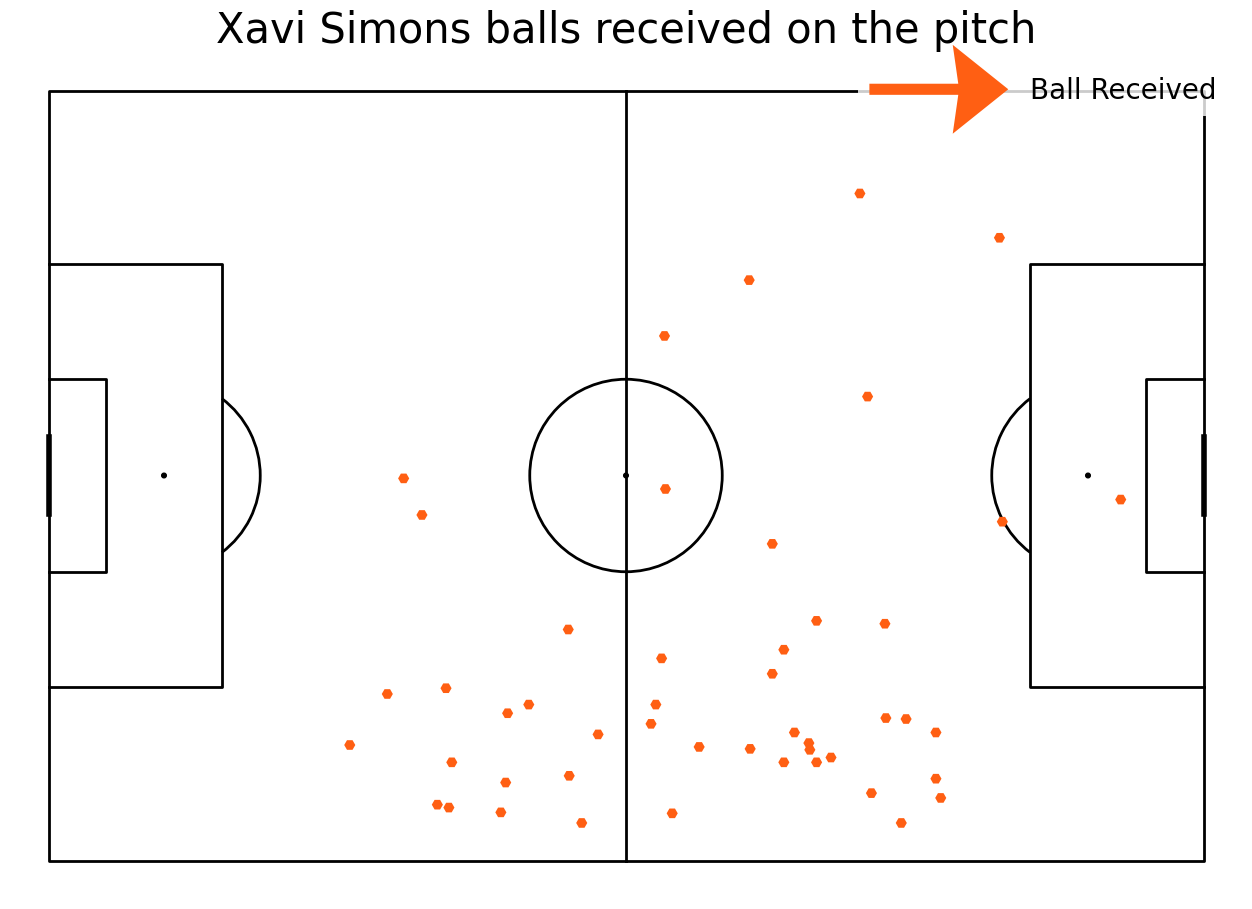

In [38]:
events_types = ['Ball Receipt*']
player_ball_rec=match_events[(match_events.player==player_name)&(match_events.type.isin(events_types))]

# campo
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_zorder=2, line_color='black')
fig, ax = pitch.draw(figsize=(16, 11),constrained_layout=True, tight_layout=False)
fig.set_facecolor('white')

# bolas recebidas
pitch.arrows(player_ball_rec.x, player_ball_rec.y,
             player_ball_rec.x, player_ball_rec.y,
width=8,
headwidth=8, headlength=5, color=pass_colour, ax=ax, zorder=2, label = "Ball Received")




ax.legend(facecolor='white', handlelength=5, edgecolor='None', fontsize=20, loc='best')
ax_title = ax.set_title(f'{player_name} balls received on the pitch', fontsize=30,color='black')

# Progressões e passes no último terço


#### Filtrando por passes que começaram foram do último terço e terminaram dentro dele. Passes que foram completados

In [39]:
f3rd_passes=match_events[(match_events.team==team)&(match_events.type=="Pass")&(match_events.x<80)&(match_events.pass_end_x>80)&(match_events.pass_outcome.isna())]

f3rd_passes_count=f3rd_passes.groupby('player').size().reset_index()

f3rd_passes_count.rename(columns={f3rd_passes_count.columns[1]: "Passes" }, inplace = True)

In [40]:
f3rd_passes_count

,player,Passes
0,Jerdy Schouten,3
1,Joey Veerman,5
2,Joshua Zirkzee,1
3,Nathan Aké,1
4,Stefan de Vrij,5
5,Tijjani Reijnders,3
6,Virgil van Dijk,1
7,Xavi Simons,2


#### Agora, as conduções de bola que começaram fora e terminaram dentro do último terço

In [41]:
f3rd_carries=match_events[(match_events.type=="Carry")&(match_events.x<80)&(match_events.carry_end_x>80)&(match_events.team==team)]

f3rd_carries_count=f3rd_carries.groupby('player').size().reset_index()

f3rd_carries_count.rename(columns={f3rd_carries_count.columns[1]: "Carries" }, inplace = True)

In [42]:
# Passes e conduções no mesmo dataframe
df_passes_carries = pd.merge(f3rd_passes_count, f3rd_carries_count,
                    how="outer", on=["player"])
# Preenchendo os valores nulos com 0
df_passes_carries = df_passes_carries.fillna(0)

# Criando uma coluna com a soma dos passes e conduções
df_passes_carries['Total'] = df_passes_carries['Passes'] + df_passes_carries['Carries']


df_passes_carries.sort_values(by='Total', ascending=False, inplace=True)

df_passes_carries

,player,Passes,Carries,Total
9,Xavi Simons,2.0,5.0,7.0
2,Joey Veerman,5.0,2.0,7.0
6,Stefan de Vrij,5.0,1.0,6.0
7,Tijjani Reijnders,3.0,3.0,6.0
1,Jerdy Schouten,3.0,0.0,3.0
0,Cody Mathès Gakpo,0.0,2.0,2.0
5,Nathan Aké,1.0,0.0,1.0
4,Memphis Depay,0.0,1.0,1.0
3,Joshua Zirkzee,1.0,0.0,1.0
8,Virgil van Dijk,1.0,0.0,1.0


### Gráfico de barras

<Figure size 1500x1500 with 0 Axes>

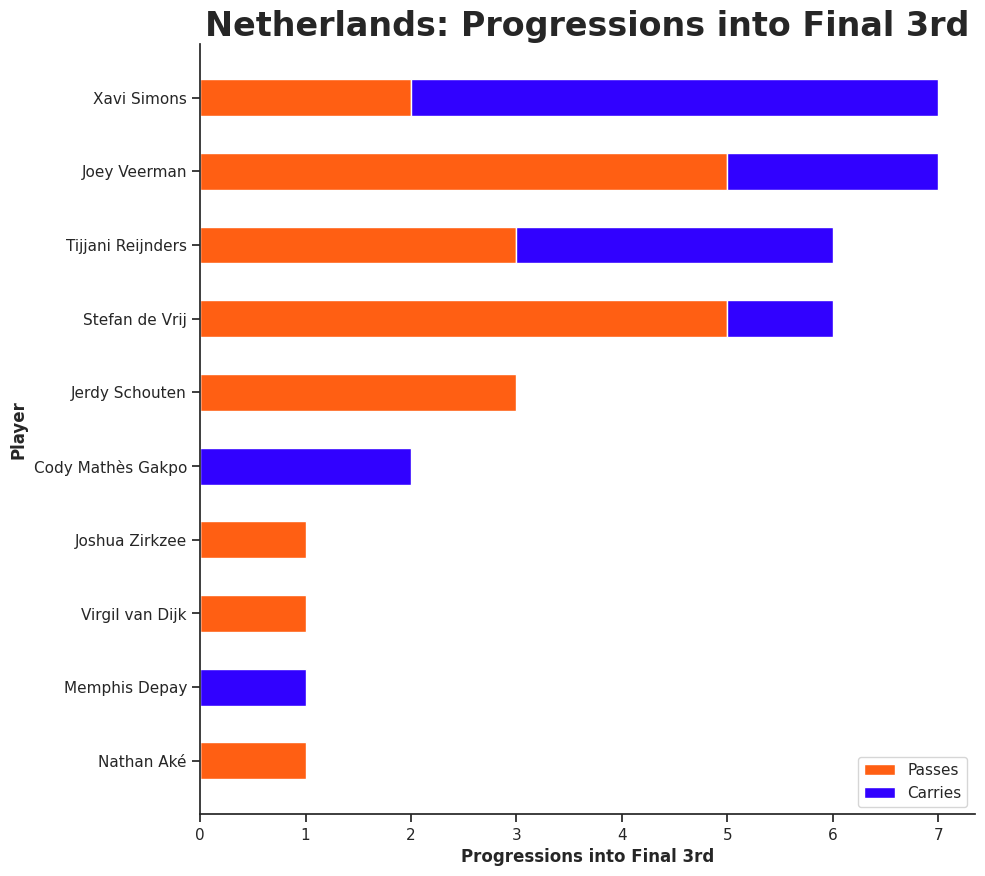

In [43]:
pass_colour='#FF5F13'
carry_colour='#3101FF'

#sort to get lowest values first (so that it plots in the correct order on our bar chart)
df_passes_carries.sort_values(by='Total', ascending=True, inplace=True)

#include only relevant columns
barchart_df=df_passes_carries[["player", "Passes", "Carries"]]


#create figure and set some style parameters
plt.figure(figsize = (15,15))
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("ticks")

#create bar chart
barchart_df.set_index('player').plot(kind='barh', stacked=True,color=[pass_colour, carry_colour],legend=True,figsize=(10,10))

#add chart labels and title
plt.xlabel(xlabel="Progressions into Final 3rd",fontdict = { 'fontsize': 12, 'weight':'semibold'})
plt.ylabel(ylabel="Player",fontdict = { 'fontsize': 12, 'weight':'semibold'})
plt.title(f"{team}: Progressions into Final 3rd",fontdict = { 'fontsize': 24, 'weight':'bold'})

#keep two axes
sns.despine(top=True, right=True, left=False, bottom=False)
plt.autoscale()
plt.show()

### Campo

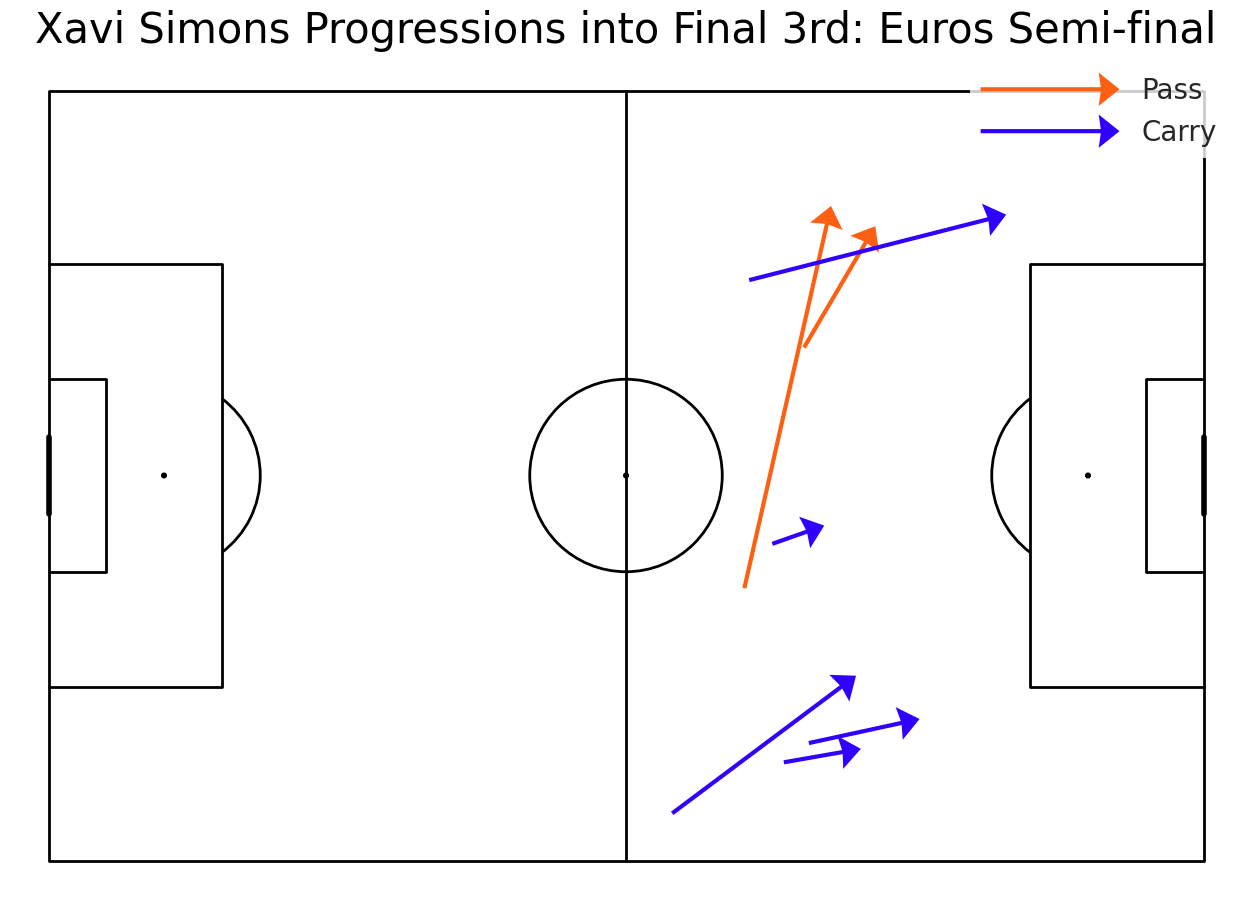

In [44]:

player_passes=f3rd_passes[(f3rd_passes.player==player_name)]
player_carries=f3rd_carries[(f3rd_carries.player==player_name)]

# campo
pitch = Pitch(pitch_type='statsbomb', pitch_color='white', line_zorder=2, line_color='black')
fig, ax = pitch.draw(figsize=(16, 11),constrained_layout=True, tight_layout=False)
fig.set_facecolor('white')

# passes
pitch.arrows(player_passes.x, player_passes.y,
player_passes.pass_end_x, player_passes.pass_end_y, width=3,
headwidth=8, headlength=5, color=pass_colour, ax=ax, zorder=2, label = "Pass")

# conducoes
pitch.arrows(player_carries.x, player_carries.y,
player_carries.carry_end_x, player_carries.carry_end_y, width=3,
headwidth=8, headlength=5, color=carry_colour, ax=ax, zorder=2, label = "Carry")


ax.legend(facecolor='white', handlelength=5, edgecolor='None', fontsize=20, loc='best')
ax_title = ax.set_title(f'{player_name} Progressions into Final 3rd: Euros Semi-final', fontsize=30,color='black')

# Chutes e gols - gráfico

In [45]:
# excluindo pênaltis da conta de chutes e gols

shots_df=match_events[(match_events.type=="Shot")&(match_events.shot_type!="Penalty")]
goals_df=match_events[(match_events.type=="Shot")&(match_events.shot_type!="Penalty")&(match_events.shot_outcome=="Goal")]

# chutes
shots_count=shots_df.groupby(['player','team']).size().reset_index()
shots_count.rename(columns={shots_count.columns[2]: "shots" }, inplace = True)


# gols
goals_count=goals_df.groupby(['player', 'team']).size().reset_index()
goals_count.rename(columns={goals_count.columns[2]: "goals" }, inplace = True)


# xG
xg_sum=shots_df.groupby(['player', 'team'])['shot_statsbomb_xg'].sum().reset_index()
xg_sum.rename(columns={xg_sum.columns[2]: "xg" }, inplace = True)
xg_sum['xg']=xg_sum['xg'].round(2)


# combinando dataframes
#shot_stats=pd.merge(shots_count, goals_count,
#                    how="outer", on=["player", "team"]).fillna(0)

#shot_stats=pd.merge(shot_stats, xg_sum,
#                    how="outer", on=["player", "team"]).fillna(0)


In [46]:
# usando reduce para combinar chutes, gols e xG ao mesmo tempo

dfs_list = [shots_count, goals_count,xg_sum]

def merge_dfs(left, right):
    return pd.merge(left, right, on=["player", "team"], how = 'outer').fillna(0)

shot_stats = reduce(merge_dfs, dfs_list)
shot_stats['goals'] = shot_stats['goals'].astype('int32')

In [47]:
player_goals_df=goals_df[(goals_df.player==player_name)]

player_shots_df=shots_df[(shots_df.player==player_name)&(shots_df.shot_outcome!="Goal")]

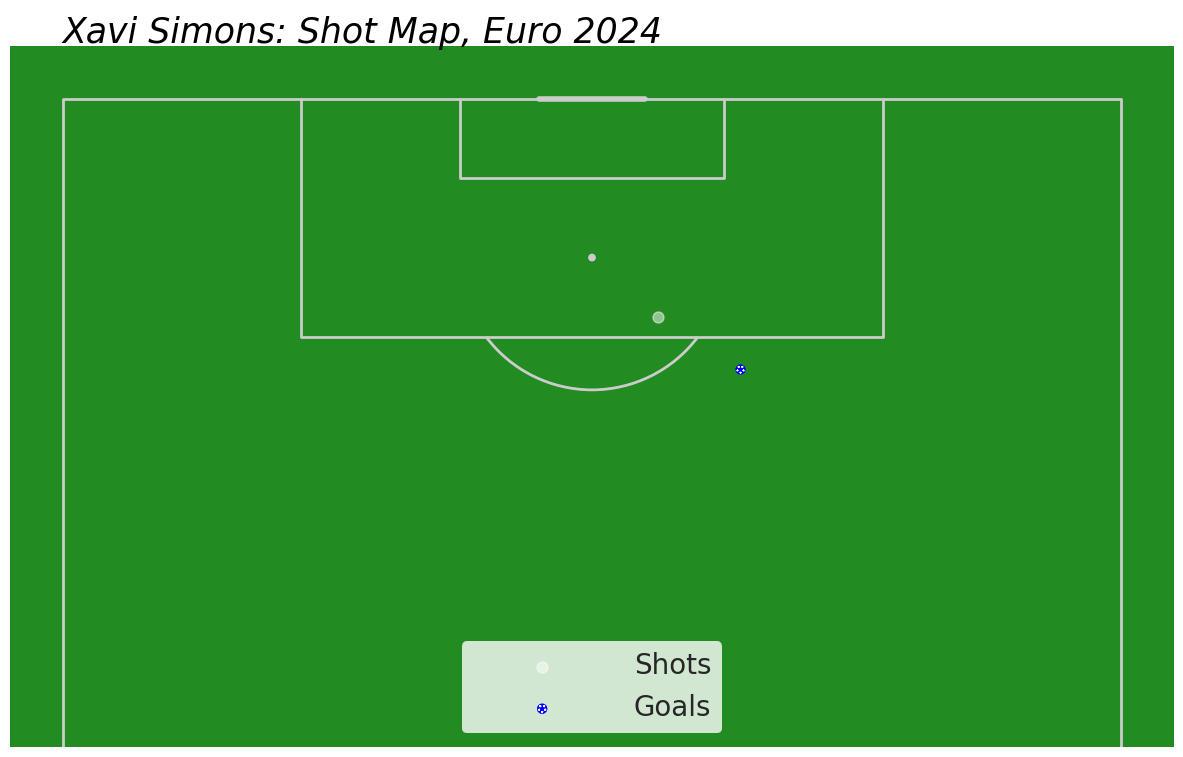

In [48]:
pitch = VerticalPitch(pitch_type='statsbomb',half=True,pad_bottom=-11, pitch_color='forestgreen')
fig, ax = pitch.draw(figsize=(12, 10))

shot_colour='white'
goal_colour='blue'

shots = pitch.scatter(player_shots_df.x, player_shots_df.y,
#make size relative to xG value
s=player_shots_df.shot_statsbomb_xg*1000,
c=shot_colour,
label='Shots',
marker='o',
alpha=0.5,
ax=ax)

goals = pitch.scatter(player_goals_df.x, player_goals_df.y,
#make size relative to xG value
s=player_goals_df.shot_statsbomb_xg*1000,
c='white',
edgecolors=goal_colour,
label='Goals',
marker='football',
ax=ax)

#plot the legend
ax.legend(facecolor='white', handlelength=5, edgecolor='None', fontsize=20, loc='best')

ax_text(0, 125, f'{player_name}: Shot Map, Euro 2024', ha='left', c='black',va='center', fontsize=25,ax=ax,style='italic')

In [49]:
player_shots_df=match_events[(match_events.type=="Shot")&(match_events.player==f'{player_name}')&(match_events.shot_type!="Penalty")]


In [50]:
player_shots_df.columns

Index(['50_50', 'bad_behaviour_card', 'ball_receipt_outcome',
       'block_deflection', 'block_save_block', 'carry_end_location',
       'clearance_aerial_won', 'clearance_body_part', 'clearance_head',
       'clearance_left_foot', 'clearance_right_foot', 'counterpress',
       'dribble_outcome', 'duel_outcome', 'duel_type', 'duration',
       'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_penalty', 'foul_won_advantage', 'foul_won_defensive',
       'foul_won_penalty', 'goalkeeper_body_part', 'goalkeeper_end_location',
       'goalkeeper_outcome', 'goalkeeper_position', 'goalkeeper_punched_out',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'injury_stoppage_in_chain', 'interception_outcome', 'location',
       'match_id', 'minute', 'off_camera', 'out', 'pass_aerial_won',
       'pass_angle', 'pass_assisted_shot_id', 'pass_body_part', 'pass_cross',
       'pass_cut_back', 'pass_deflected', 'pass_end_location',
       'pass_goal_assis

In [51]:
player_shots_df

,50_50,bad_behaviour_card,ball_receipt_outcome,block_deflection,block_save_block,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,...,team_id,timestamp,type,under_pressure,x,y,pass_end_x,pass_end_y,carry_end_x,carry_end_y
3440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,941,00:06:41.445,Shot,NaN,99.6,51.2,NaN,NaN,NaN,NaN
3453,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,941,00:31:58.901,Shot,NaN,103.5,45.0,NaN,NaN,NaN,NaN


In [52]:
player_shots_df['shot_outcome']

3440     Goal
3453    Saved
Name: shot_outcome, dtype: object

In [53]:
player_shots_df['shot_end_location']

3440    [120.0, 37.4, 2.0]
3453    [118.7, 40.0, 1.6]
Name: shot_end_location, dtype: object

In [54]:
player_shots_df[['x','y']]

,x,y
3440,99.6,51.2
3453,103.5,45.0


In [55]:
# Próximos passos:
#   1. Unificar no dicionário as quantidades e os dados de localização dos eventos que tem gráfico (chutes, ações com bola etc)
#   2. Representar graficamente a direção do chute